#### Assignment 02 - Tooth wheel 

Develop an algorithm for automatic detection of defects of the tooth wheels.  Directory  `images` stores a few images: `img_OK.png` with OK sample of the tooth wheel. Files `img_1_NOK.png` and `img_2_NOK.png` are images of a tooth wheel with different kind of defects. The typical defects are bad shape of the tooth or wrong diameter of the holes in the tooth wheel. The algorithm should check each tooth whether it has a proper size. The location and orientation of the tooth wheel in the image is random. Marker the found defects into the image with the thick red bounding box. To the corner of the image put number of the detected defets. 
<center><img src="images\\output.png" align="center"/></center> 


In [1322]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

Input image
1- NOK because of the shape of tooth image
2- NOK because of wrong diameter of holes image
3- OK image

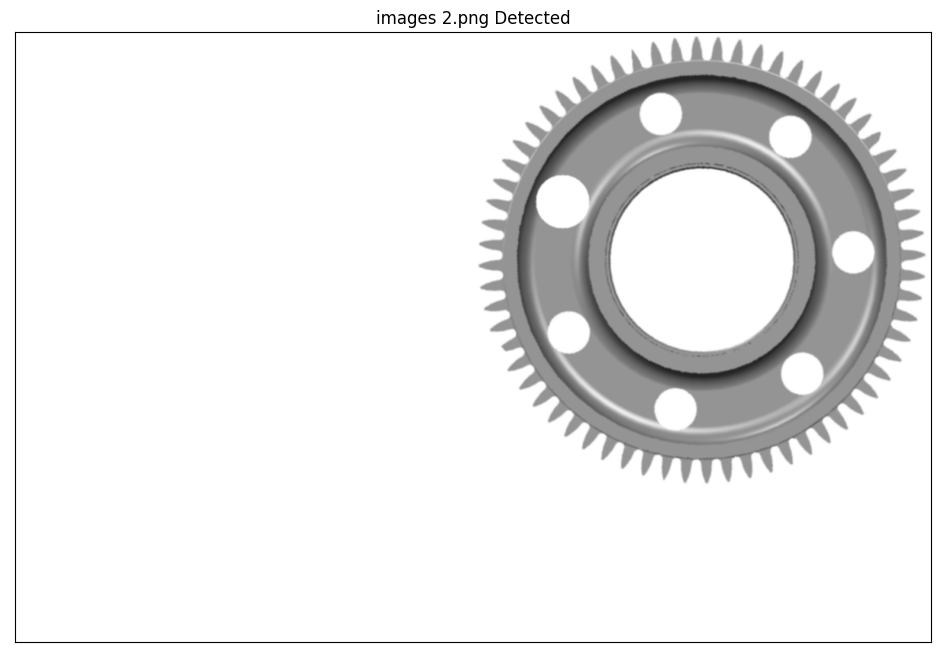

In [1487]:
# Read image 

num=input('enter any number between 1 to 3:  1-NOK-shape of tooth  2- NOK because of wrong diameter of hole,  3-OK ')
#2- NOK because of wrong diameter of hole,  3-OK 
file='images/'+num+'.png'
img=cv2.imread(file)
img_1=img.copy()
plt.figure(figsize = (26,10))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('images '+num+'.png Detected'), plt.xticks([]), plt.yticks([])
plt.show()

### Code for Testing the Shape of the Tooth

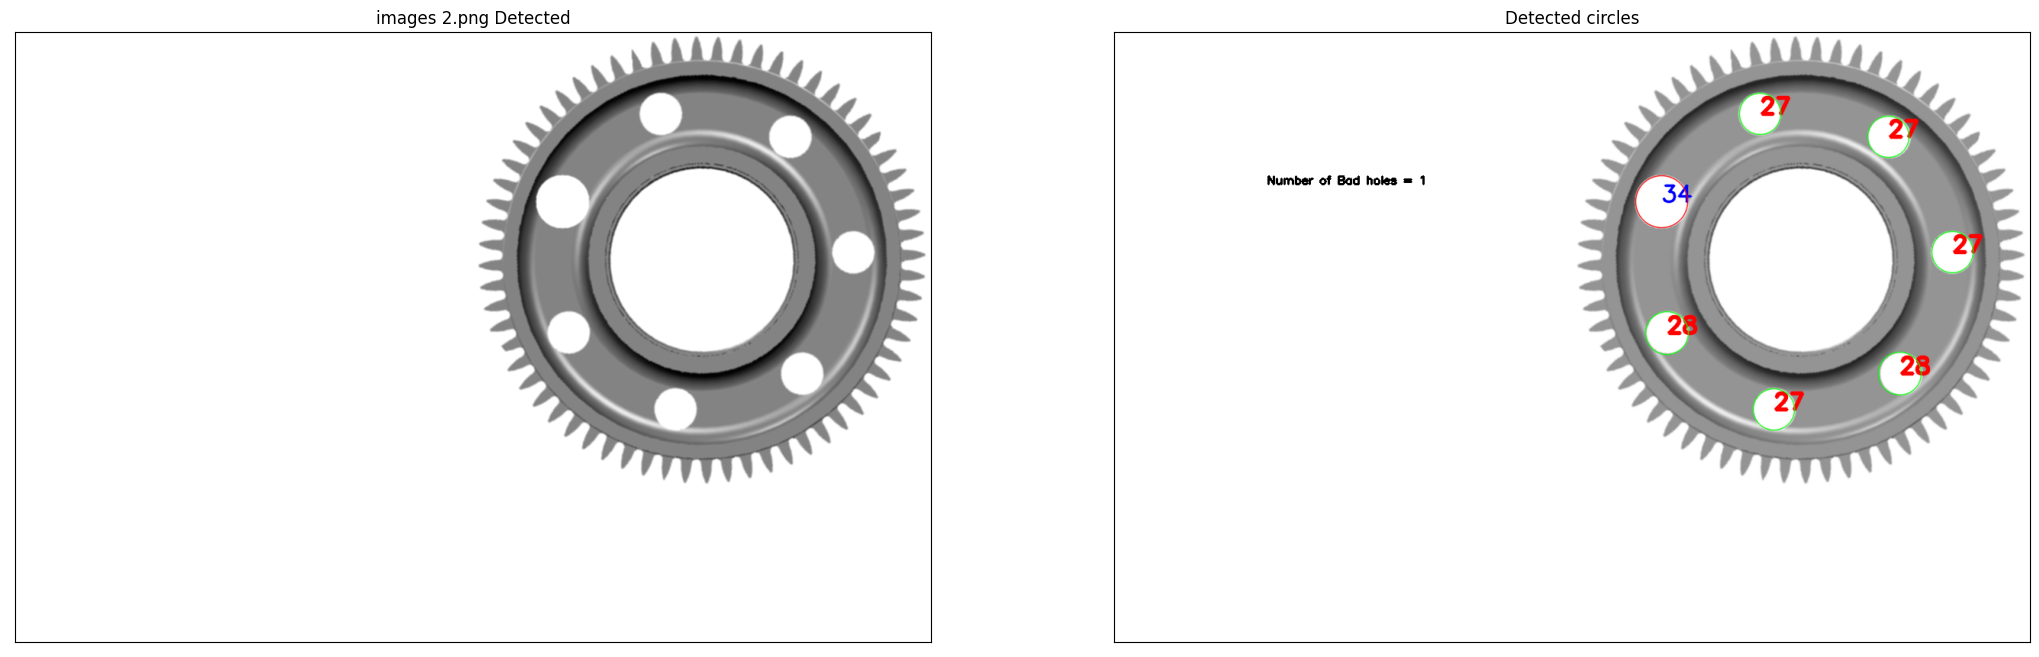

In [1488]:
# Convert to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray, 5)
_,thresh = cv2.threshold(gray,35,255,cv2.THRESH_BINARY)
edges = cv2.Canny(gray,100,200)
circles = cv2.HoughCircles( gray, method = cv2.HOUGH_GRADIENT, dp = 1, minDist = 20, param1 = 200, param2 = 30, minRadius = 5, maxRadius = 40)
if circles is not None:
    for i in range(0,circles.shape[1]):
        x = int(circles[0][i][0])
        y = int(circles[0][i][1])
        radius = int(circles[0][i][2])
        #print('radius ='+str(radius))
        #print('x ='+str(x))
        #print('y ='+str(y))
        if 25<=radius<=30:
            cv2.putText(img, str(radius), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),3, cv2.LINE_AA)
            cv2.circle(img, (x, y), radius, (0,255,0), 1, cv2.LINE_AA)
            
        elif radius >30:
            cv2.putText(img, str(radius), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
            cv2.circle(img, (x, y), radius, (255,0,0), 1, cv2.LINE_AA)
            cv2.putText(img,"Number of Bad holes = " + str(len(circles)), (200, 200),  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)    
            
    
                  
    plt.figure(figsize = (26,10))
    plt.subplot(121),plt.imshow(gray,cmap = 'gray')
    plt.title('images '+num+'.png Detected'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img)
    plt.title('Detected circles'), plt.xticks([]), plt.yticks([])
    plt.show() 
  
else:
    print("No circle detected") 

### Code for Testing the Diameter of Holes

1. first threshold the image to obtain binary image of the wheel, because there is white background and dark object we need cv2.THRESH_BINARY_INV

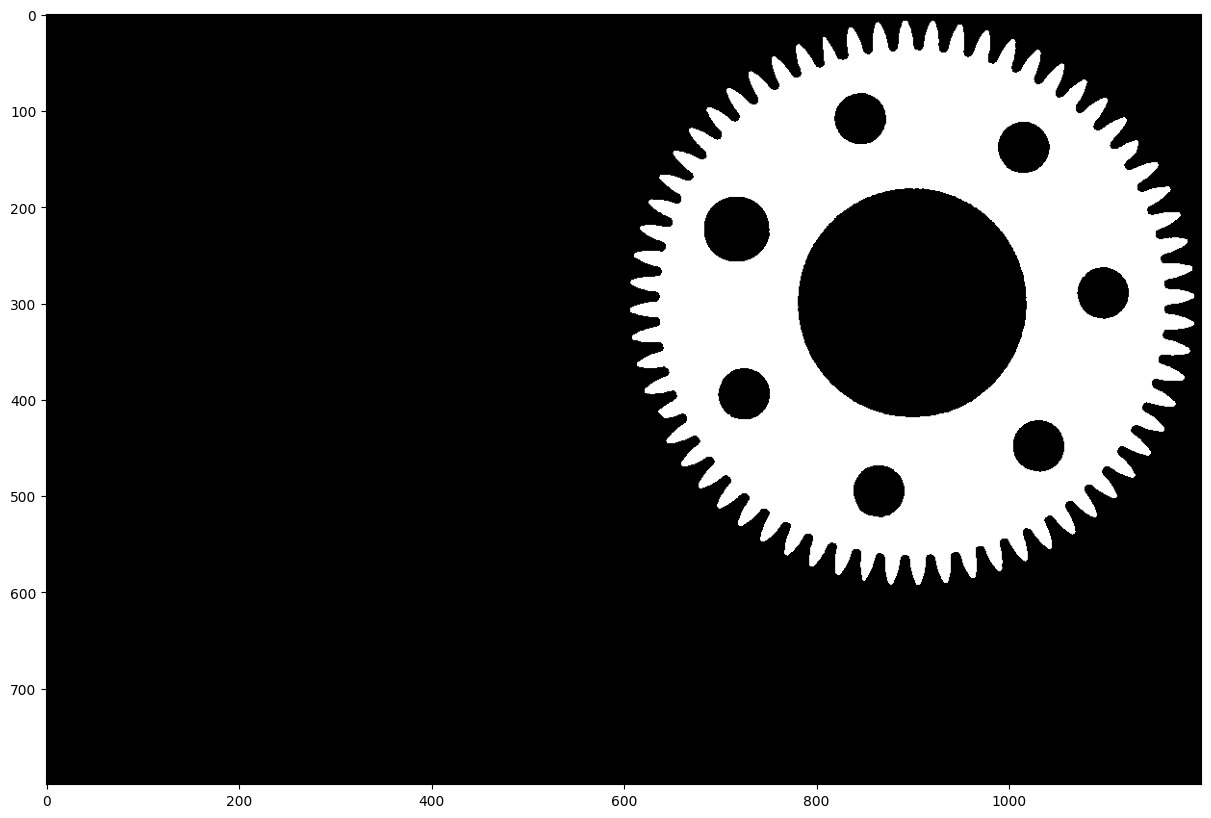

In [1489]:
retval, thresh = cv2.threshold(gray,240,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (26,10))
plt.imshow(thresh,cmap='gray') 
plt.show()

2. Then find the center of big circle in the middle of the object in the grey image

radius =243
x =900
y =299


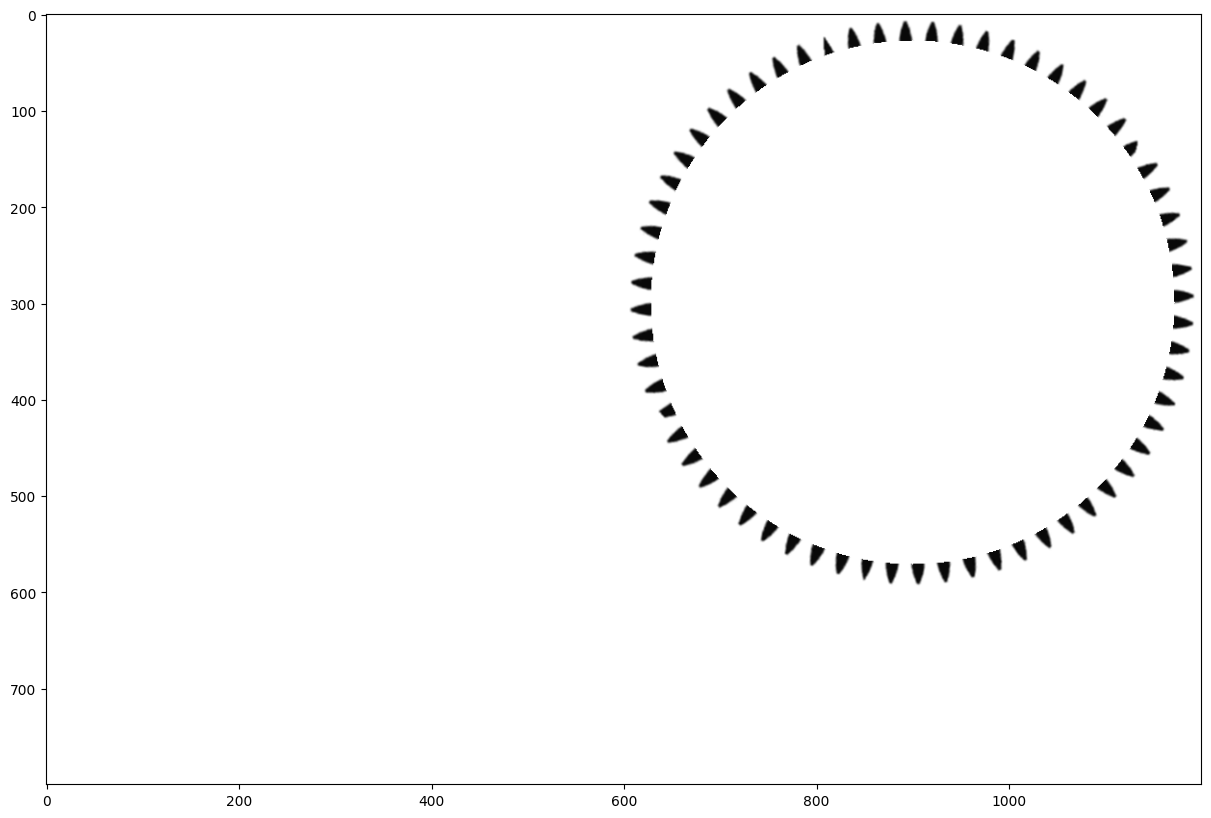

In [1490]:
circles = cv2.HoughCircles( gray, method = cv2.HOUGH_GRADIENT, dp =2.1, minDist = 250, param1 = 40, param2 = 100, minRadius = 200, maxRadius = 250)
# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		print('radius ='+str(r))
		print('x ='+str(x))
		print('y ='+str(y))
        
cv2.circle(gray, (x, y), (r+29), (255,0.0), -1)
plt.figure(figsize = (26,10))
plt.imshow(gray, cmap='gray')
plt.show()

3. Create an image with the white circle of appropriate radius at the obtain center. The radius must be smaller than the tip of teeth but big enough so the teeth are segmented

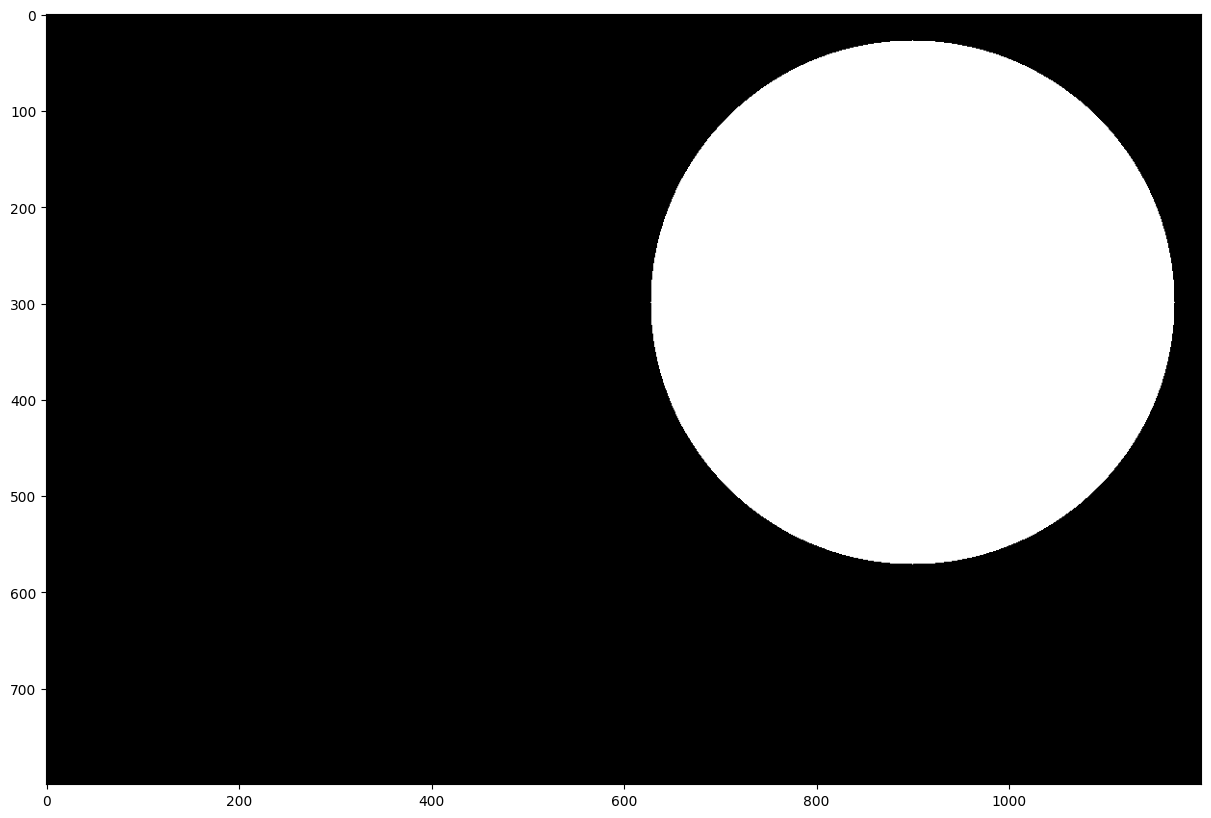

In [1491]:
# draw White circle
whiteblankimage =  np.zeros_like(thresh)
cv2.circle(whiteblankimage, center=(x,y), radius=(r+29), color=(255,255,255), thickness= -1)

plt.figure(figsize = (26,10))
plt.imshow(whiteblankimage,cmap='gray')
plt.show()

4. Subtract two image

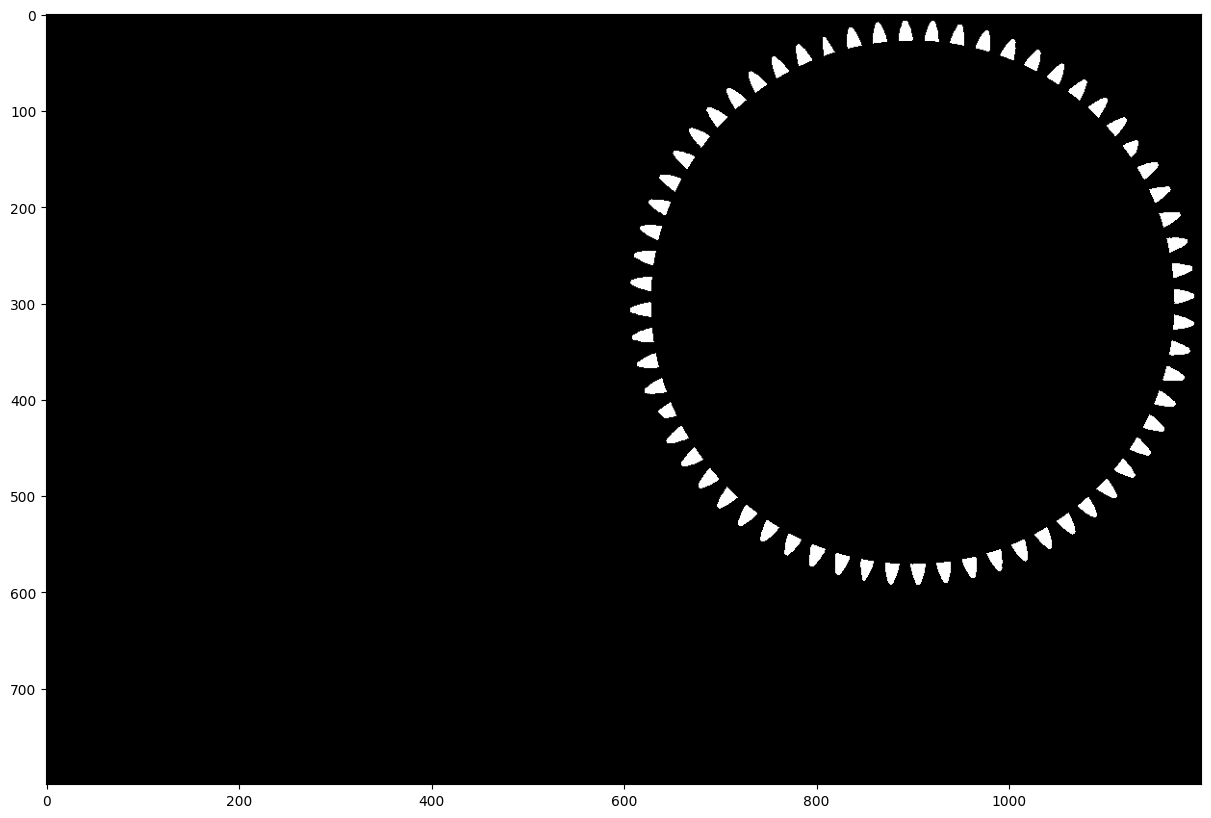

In [1492]:
newimg=cv2.subtract(thresh,whiteblankimage)
plt.figure(figsize = (26,10))
plt.imshow(newimg,cmap='gray')
plt.show()

5. Find all the countours in the image and analyze the shape/area of each contour in a for cycle. If the area is not enough, compute bounding box from the contour and draw the bounding box on the image.

2


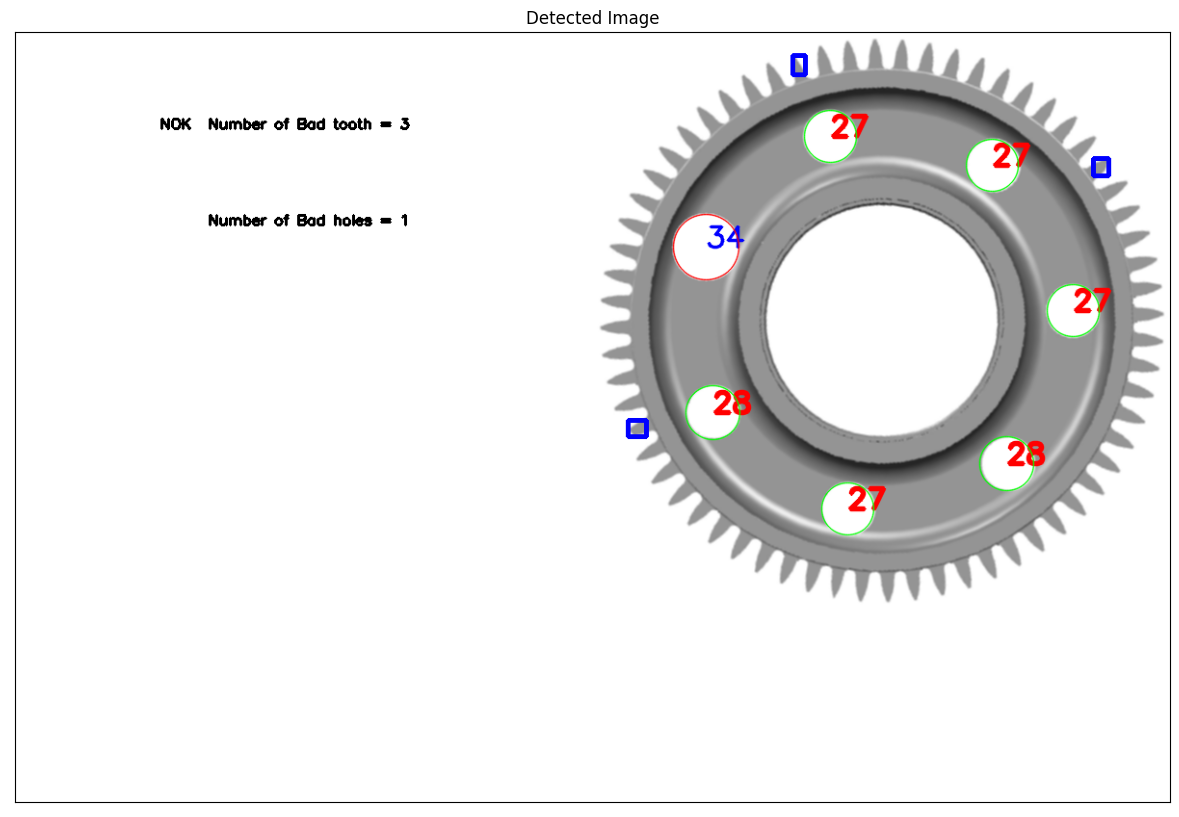

In [1493]:
contours, hierarchy = cv2.findContours(newimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnt_area = []
for i in range(0,len(contours),1):
          
        cnt = contours[i]
        #print(cv2.contourArea(cnt))
        if  (0<cv2.contourArea(cnt) <168): # for contour area less than given limit, the teeth considered as a bad teeth. 
        #if  (0<cv2.contourArea(cnt) <166):  
            # Use OpenCV boundingRect function to get the details of the contour
            x,y,w,h = cv2.boundingRect(cnt)
           
            count=cv2.boundingRect(cnt)
            # Draw the bounding box
           
            image=cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cnt_area.append(cv2.contourArea(contours[i]))
            

if len(cnt_area)==0:           
    cv2.putText(img,"OK" , (150, 100),  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    cv2.imwrite("OK.png",img)
else:
    cv2.putText(img,"NOK" , (150, 100),  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    cv2.putText(img,"Number of Bad tooth = " + str(len(cnt_area)), (200, 100),  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    #cv2.imwrite("NOK-Shape_of_Theet_NOK.png",img) 
    cv2.imwrite("NOK-Shape_of_Theet_and_Diameter_holes_NOK.png",img) 
print(num)
plt.figure(figsize = (26,10))
plt.imshow(img,cmap='gray')
#Contours
plt.title('Detected Image'), plt.xticks([]), plt.yticks([])
plt.show()
